In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df = df.drop(df.loc[df.release_date.isnull(), :].index)

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 21 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
homepage                1712 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
original_title          4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 3959 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 n

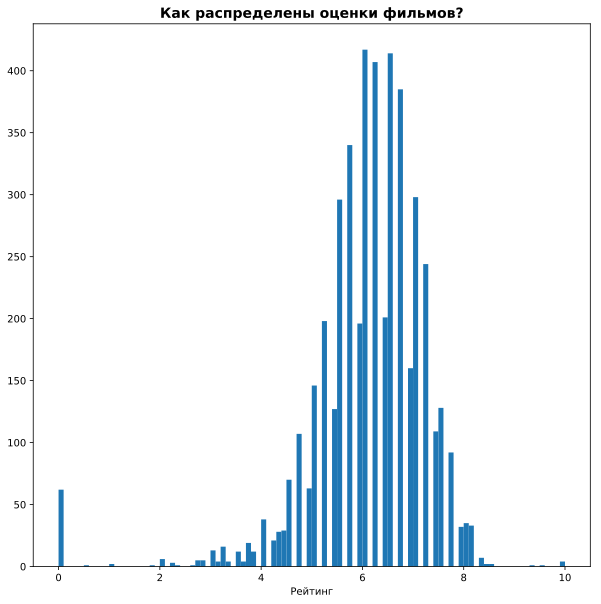

In [5]:
plt.figure(figsize=(10,10))
plt.title ('Как распределены оценки фильмов?', fontsize=14, fontweight='bold')
plt.xlabel('Рейтинг')
plt.hist(df.vote_average, bins=100);

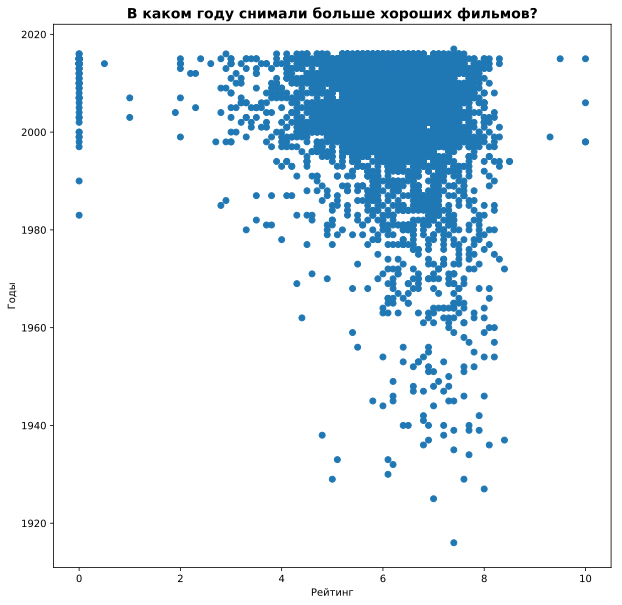

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x=df.vote_average, y=df.year)
plt.title ('В каком году снимали больше хороших фильмов?', fontsize=14, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Годы')
plt.show()

#### Посмотрм на корреляцию между призеаками

In [7]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
budget,1.000000,-0.088963,0.505364,0.730806,0.269792,0.092644,0.593148,0.168990
id,-0.088963,1.000000,0.031760,-0.050113,-0.150497,-0.267822,-0.003710,0.434943
popularity,0.505364,0.031760,1.000000,0.644700,0.225372,0.273990,0.778114,0.101998
revenue,0.730806,-0.050113,0.644700,1.000000,0.251188,0.197153,0.781475,0.090192
runtime,0.269792,-0.150497,0.225372,0.251188,1.000000,0.371888,0.272036,-0.166849
vote_average,0.092644,-0.267822,0.273990,0.197153,0.371888,1.000000,0.313263,-0.198499
vote_count,0.593148,-0.003710,0.778114,0.781475,0.272036,0.313263,1.000000,0.114212
year,0.168990,0.434943,0.101998,0.090192,-0.166849,-0.198499,0.114212,1.000000


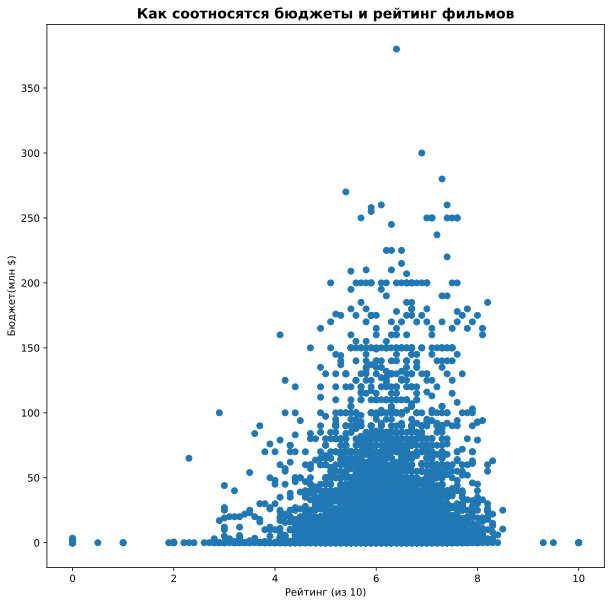

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['vote_average'], y=df['budget']/(10**6))
plt.title ('Как соотносятся бюджеты и рейтинг фильмов', fontsize=14, fontweight='bold')
plt.xlabel('Рейтинг (из 10)')
plt.ylabel('Бюджет(млн $)')
plt.show()

In [9]:
df['profit'] = df['budget'] < df['revenue']

In [10]:
profit_films = df.loc[df.profit == True, :]
print(f'Прибыльны приблизительно {round(profit_films.profit.size / df.profit.size * 100)}% фильмов или {profit_films.profit.size} штук')

Прибыльны приблизительно 54% фильмов или 2585 штук


In [11]:
print(f'Из них с рейтингом выше 5 баллов {profit_films.loc[profit_films.vote_average > 5, :].profit.size} или {round(profit_films.loc[profit_films.vote_average > 5, :].profit.size / profit_films.profit.size * 100)}%')

Из них с рейтингом выше 5 баллов 2449 или 95%


#### Это значит, что можно снимать треш и все еще оставаться в прибыли, но шанс этого всего 5%

### Я хочу найти самые прибыльные фильмы и понять, что у них общего

In [12]:
df['clean_profit'] = df['revenue'] - df['budget']

Собираем топ 25 фильмов с максимальной прибылью

In [13]:
most_success = df.nlargest(25, 'clean_profit')
most_success

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit,clean_profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,True,2550965087
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,1997,True,1645034188
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,2015,True,1363528810
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,2015,True,1316249360
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,2012,True,1299557910
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,2015,True,1125403694
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295,2013,True,1124219009
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,2015,True,1082730962
329,94000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.lordoftherings.net,122,"[{""id"": 603, ""name"": ""elves""}, {""id"": 606, ""na...",en,The Lord of the Rings

#### Достаем жанры в отдельный датафрейм

In [14]:
df_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'revenue'])

def dataPrep(row):
    global df_genre
    d = {}
    genres = np.array([g['name'] for g in eval(row['genres'])])
    n = genres.size
    d['budget'] = [row['budget']]*n
    d['revenue'] = [row['revenue']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index=True, sort=True)

most_success.apply(dataPrep, axis=1)
df_genre = df_genre[['genre', 'budget', 'revenue', 'cgenres']]
df_genre = df_genre.infer_objects()

In [15]:
df_genre.head()

,genre,budget,revenue,cgenres
0,Action,237000000,2787965087,"[Adventure, Fantasy, Science Fiction]"
1,Adventure,237000000,2787965087,"[Action, Fantasy, Science Fiction]"
2,Fantasy,237000000,2787965087,"[Action, Adventure, Science Fiction]"
3,Science Fiction,237000000,2787965087,"[Action, Adventure, Fantasy]"
4,Drama,200000000,1845034188,"[Romance, Thriller]"


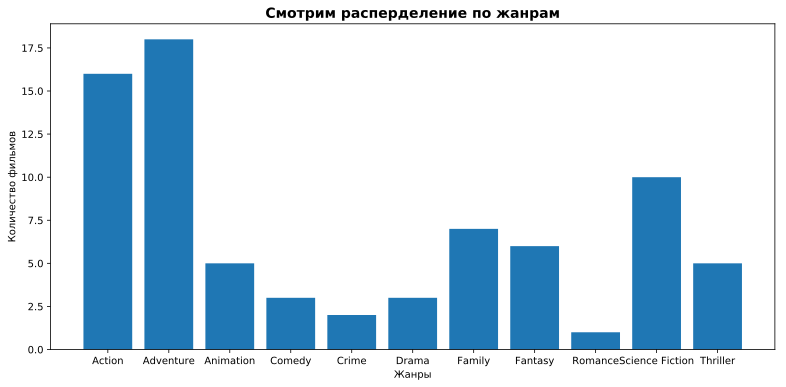

In [16]:
genre_count = df_genre['genre'].value_counts().sort_index()
genre_count_df = pd.DataFrame(data = {'genre':genre_count.index, 'count':genre_count.values})
plt.figure(figsize=(13,6))
plt.bar(genre_count_df['genre'], genre_count_df['count'])
plt.title ('Смотрим расперделение по жанрам', fontsize=14, fontweight='bold')
plt.ylabel('Количество фильмов')
plt.xlabel('Жанры')
plt.show()

#### Видим, что с сильным отрывом лидируют Экшен и Приключения. На третьем месте Научная фантастика.

#### Дальше играем со студиями

In [17]:
df_company = pd.DataFrame(columns = ['company', 'c_companies', 'budget', 'revenue'])

def dataCompanyPrep(row):
    global df_company
    d = {}
    companies = np.array([g['name'] for g in eval(row['production_companies'])])
    n = companies.size
    d['budget'] = [row['budget']]*n
    d['revenue'] = [row['revenue']]*n
    d['company'], d['c_companies'] = [], []
    for company in companies:
        d['company'].append(company)
        d['c_companies'].append(companies[companies != company])
    df_company = df_company.append(pd.DataFrame(d), ignore_index=True, sort=True)

most_success.apply(dataCompanyPrep, axis=1)
df_company = df_company[['company', 'budget', 'revenue', 'c_companies']]
df_company = df_company.infer_objects()

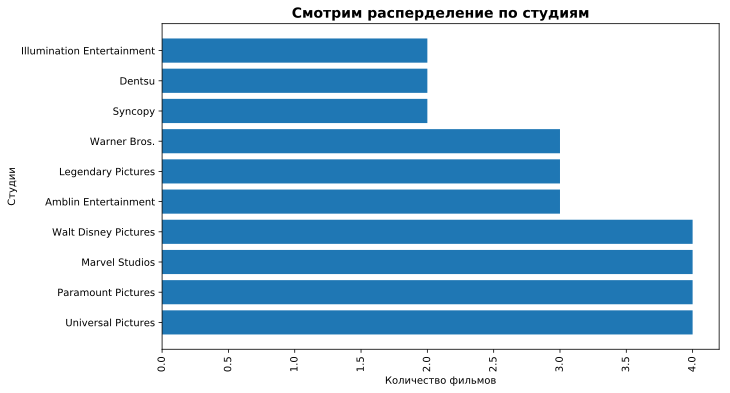

In [19]:
company_count = df_company['company'].value_counts().sort_values()
company_count_df = pd.DataFrame(data = {'company':company_count.index, 'count':company_count.values})
company_count_df = company_count_df.nlargest(10, 'count')
plt.figure(figsize=(10,6))
plt.barh(company_count_df['company'], company_count_df['count'])
plt.title ('Смотрим расперделение по студиям', fontsize=14, fontweight='bold')
plt.xlabel('Количество фильмов')
plt.ylabel('Студии')
plt.xticks(rotation=90)
plt.show()

#### Явно заметно доминирование первых 4х студий в данной выборке. Посмотрим на большем к-ве данных данных.

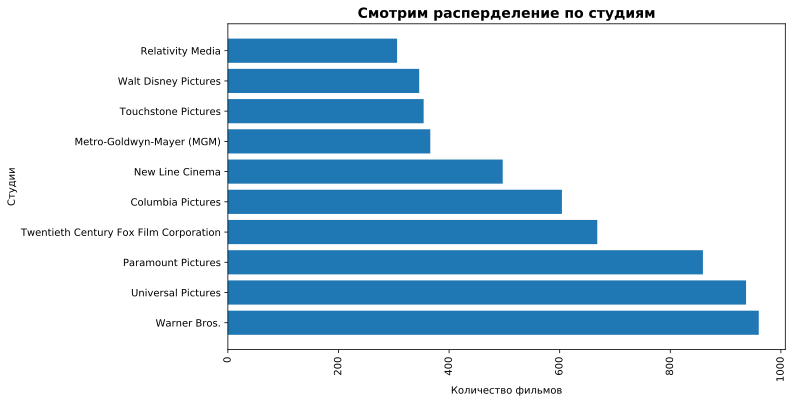

In [22]:
df.apply(dataCompanyPrep, axis=1)
df_company = df_company[['company', 'budget', 'revenue', 'c_companies']]
df_company = df_company.infer_objects()
company_count = df_company['company'].value_counts().sort_values()
company_count_df = pd.DataFrame(data = {'company':company_count.index, 'count':company_count.values})
company_count_df = company_count_df.nlargest(10, 'count')
plt.figure(figsize=(10,6))
plt.barh(company_count_df['company'], company_count_df['count'])
plt.title ('Смотрим расперделение по студиям', fontsize=14, fontweight='bold')
plt.xlabel('Количество фильмов')
plt.ylabel('Студии')
plt.xticks(rotation=90)
plt.show()

#### Можно сделать вывод, что большинство денег в современной киноиндустрии зарабатывают 4-5 крупнейших игроков, таких как Warner Bros., Paramount Pictures, Universal Pictures. Они действуют по общей стратегии — выпускают фильмы в "денежных" жинрах (Экшн, Преключения, Научная Фантастика, Фэнтези, Триллер, Анимация) и ждут пока "выстрелит"